In [1]:
# Part I - WeatherPy

# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of 
# varying distance from the equator. To accomplish this, you'll be utilizing a 
# [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api),
# and a little common sense to create a representative model of weather across world cities.

# Your first requirement is to create a series of scatter plots to showcase the following relationships:

# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# After each plot add a sentence or too explaining what the code is and analyzing.

# Your second requirement is to run linear regression on each relationship, only this time separating them into
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

# * Northern Hemisphere - Temperature (F) vs. Latitude
# * Southern Hemisphere - Temperature (F) vs. Latitude
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude

# After each pair of plots explain what the linear regression is modeling such as any relationships 
# you notice and any other analysis you may have.

# Your final notebook must:

# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save a CSV of all retrieved data and a PNG image for each scatter plot.

##############################################################################################################


# Part II - VacationPy

# Now let's use your skills in working with weather data to plan future vacations. Use jupyter-gmaps

# Note:** if you having trouble displaying the maps try running `jupyter nbextension enable --py gmaps` in your 
# environment and retry.

# Create a heat map that displays the humidity for every city from the part I of the homework.

#  ![heatmap](Images/heatmap.png)

#  Narrow down the DataFrame to find your ideal weather condition. For example:

#   * A max temperature lower than 80 degrees but higher than 70.

#   * Wind speed less than 10 mph.

#   * Zero cloudiness.

#   * Drop any rows that don't contain all three conditions. You want to be sure the weather is ideal.

# Use Google Places API to find the first hotel for each city located within 500 meters of your coordinates.
# Plot the hotels on top of the humidity heatmap with each pin containing the Hotel Name, City, and Country.


In [2]:
# Dependencies
# installed citipy Python library (pip install citipy)
# https://pypi.org/project/citipy/
# installed OpenWeatherMap (pip install openweather)
# https://openweathermap.org/api

import requests
from pprint import pprint
from citipy import citipy
import numpy as np

# Remember to update the config file with your API key
from config import api_key

import pandas as pd
import os
from scipy.stats import linregress
from matplotlib import pyplot as plt

import gmaps

# Google developer API Key
# from config import gkey

In [3]:

# Range of latitudes and longitudes
cities = set()
for lat in np.linspace(-80, 80, 35):
    for long in np.linspace(-170, 180, 35):
        city = citipy.nearest_city(lat, long)
        cities.add((city.city_name, city.country_code))
print(len(cities))


608


In [4]:
def get_weather(city, country):
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    query_url = url + "appid=" + api_key + "&q=" + city + "," + country +"&units=" + units

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    return weather_json


In [5]:
jsons = {}
for city, country in cities:
    print(len(jsons), city, country)
    weather_json = get_weather(city, country)
    jsons[(city, country)] = weather_json

0 hoopstad za
1 longhua cn
2 beaune fr
3 tasiilaq gl
4 hambantota lk
5 hofn is
6 tsihombe mg
7 thinadhoo mv
8 silver city us
9 marsh harbour bs
10 illela ne
11 kalmunai lk
12 meadow lake ca
13 bambous virieux mu
14 touros br
15 miquelon pm
16 viligili mv
17 shimoda jp
18 tazovskiy ru
19 padang id
20 dicabisagan ph
21 te anau nz
22 cap malheureux mu
23 play cu vn
24 san policarpo ph
25 palabuhanratu id
26 langxiang cn
27 ust-omchug ru
28 guarulhos br
29 antofagasta cl
30 henderson us
31 aklavik ca
32 lahad datu my
33 westport ie
34 cayenne gf
35 praia da vitoria pt
36 lafiagi ng
37 general roca ar
38 tumannyy ru
39 sisimiut gl
40 nizhnevartovsk ru
41 keti bandar pk
42 stara zagora bg
43 hobart au
44 boffa gn
45 porto novo cv
46 hilo us
47 hailar cn
48 tabiauea ki
49 hellvik no
50 viesite lv
51 bafra tr
52 tiksi ru
53 odweyne so
54 lorengau pg
55 evensk ru
56 misratah ly
57 gazimurskiy zavod ru
58 arraial do cabo br
59 durgapur in
60 yellowknife ca
61 hosakote in
62 bandrele yt
63 mao td

500 pisco pe
501 kayerkan ru
502 mahadday weyne so
503 fortuna us
504 mehran ir
505 kawalu id
506 sao filipe cv
507 mae hong son th
508 mangochi mw
509 lewistown us
510 khatanga ru
511 samarai pg
512 kavaratti in
513 katsuura jp
514 rocha uy
515 salvador br
516 soyo ao
517 marseille fr
518 lagoa formosa br
519 barranca pe
520 faanui pf
521 bajo baudo co
522 grand baie mu
523 warqla dz
524 atoyatempan mx
525 hollola fi
526 camacha pt
527 butaritari ki
528 kondoa tz
529 araouane ml
530 rincon an
531 ano mera gr
532 santa rosa bo
533 saint-philippe re
534 meulaboh id
535 tabuk sa
536 ronneby se
537 dubenskiy ru
538 leshukonskoye ru
539 nelson bay au
540 gratkorn at
541 mulatupo pa
542 kieta pg
543 carauari br
544 rosetown ca
545 sungaipenuh id
546 biak id
547 yumen cn
548 woudrichem nl
549 guarapari br
550 dong hoi vn
551 arlit ne
552 korla cn
553 akdepe tm
554 makakilo city us
555 almaty kz
556 belmonte br
557 hokitika nz
558 mayo ca
559 lebu cl
560 caconda ao
561 eldorado mx
562 calderi

In [6]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 50.68, 'lon': 156.12},
 'dt': 1600357254,
 'id': 2121385,
 'main': {'feels_like': 50.54,
          'grnd_level': 1015,
          'humidity': 89,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 54.88,
          'temp_max': 54.88,
          'temp_min': 54.88},
 'name': "Severo-Kuril'sk",
 'sys': {'country': 'RU', 'sunrise': 1600370127, 'sunset': 1600415048},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 244, 'speed': 8.7}}


In [7]:
# Your first requirement is to create a series of scatter plots to showcase the following relationships:

# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# After each plot add a sentence or too explaining what the code is and analyzing.

data = {"Lat":[], "Long":[], "City":[], "Country":[], "Temperature":[], "Humidity":[], "Cloudiness":[], "Wind":[]}

for city, country in jsons:
    Weather = jsons[(city, country)]
    if Weather["cod"]=="404":
        continue
    data["City"].append(city)
    data["Country"].append(country)
    data["Lat"].append(Weather["coord"]["lat"])
    data["Long"].append(Weather["coord"]["lon"])
    data["Temperature"].append(Weather["main"]["temp"])
    data["Humidity"].append(Weather["main"]["humidity"])
    data["Cloudiness"].append(Weather["clouds"]["all"]) 
    data["Wind"].append(Weather["wind"]["speed"])
    
df = pd.DataFrame(data)
print(df.shape)
df.to_csv("city_weather.csv")
df.head()

(549, 8)


,Lat,Long,City,Country,Temperature,Humidity,Cloudiness,Wind
0,-27.83,25.91,hoopstad,za,68.04,18,0,6.06
1,23.61,114.19,longhua,cn,77.47,91,46,3.09
2,47.08,4.75,beaune,fr,85.06,39,0,17.22
3,65.61,-37.64,tasiilaq,gl,41.00,80,20,6.93
4,6.12,81.12,hambantota,lk,82.40,83,20,10.29


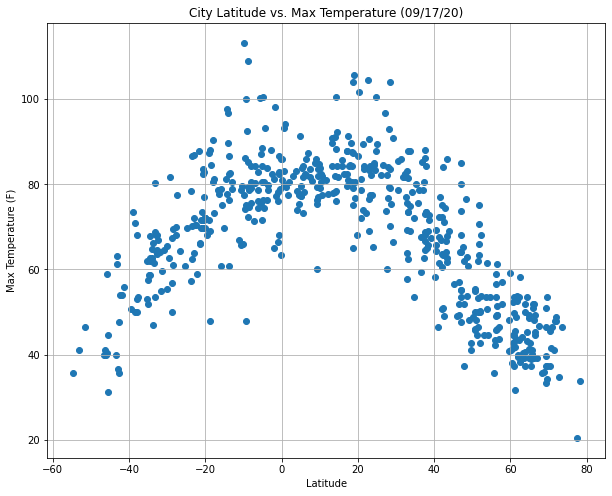

In [8]:
    
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.


# Latitude vs. Temperature Plot
import time

# Establishes size for the next visualization/graph
plt.figure(figsize=(10,8))


# Establishes type, data, and configuration for visualization/graph
plt.scatter(df["Lat"], df["Temperature"], linewidths=1, marker="o")


# Creates labels and grid for graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Exports graph as a png image file (steps are repeated for the rest of the script...)
plt.savefig("Fig1.png")

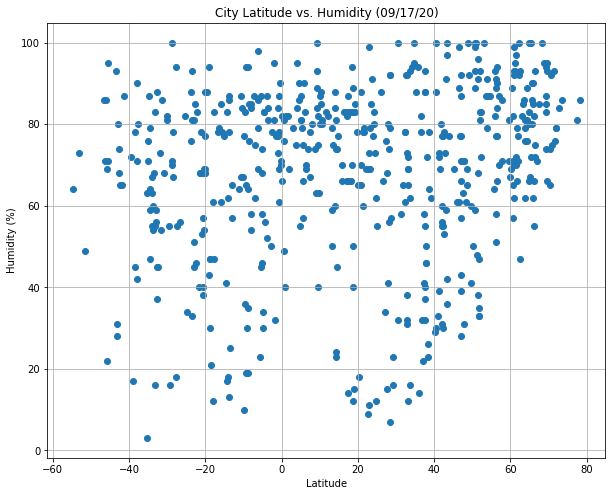

In [9]:
plt.figure(figsize=(10,8))


plt.scatter(df["Lat"], df["Humidity"], linewidths=1, marker="o")


plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


plt.savefig("Fig2.png")

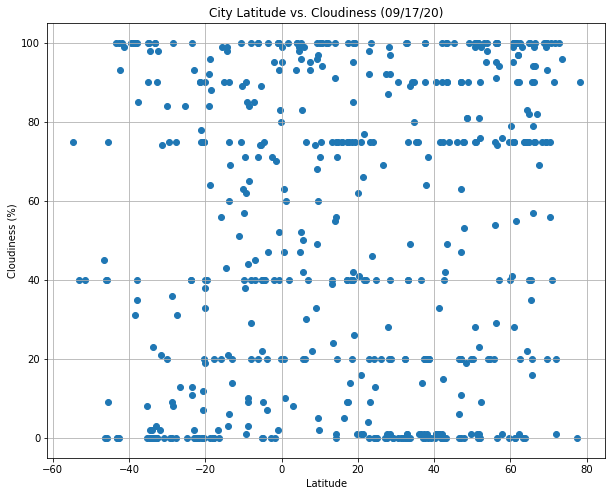

In [10]:
# Cloudiness and Latitude

plt.figure(figsize=(10,8))


plt.scatter(df["Lat"], df["Cloudiness"], linewidths=1, marker="o")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


plt.savefig("Fig3.png")

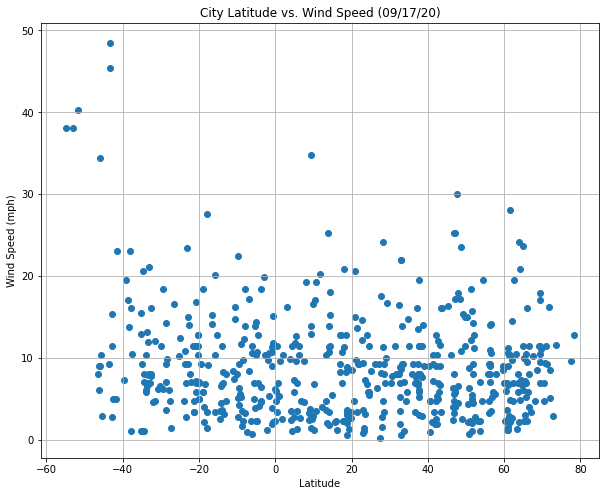

In [11]:
# Windspeed and Latitude

plt.figure(figsize=(10,8))


plt.scatter(df["Lat"], df["Wind"], linewidths=1, marker="o")


plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


plt.savefig("Fig4.png")

In [12]:
df.sort_values("Wind", ascending=False).head()


,Lat,Long,City,Country,Temperature,Humidity,Cloudiness,Wind
210,-43.25,-65.31,trelew,ar,63.23,28,0,48.50
261,-43.30,-65.10,rawson,ar,61.27,31,0,45.41
222,-51.62,-69.22,rio gallegos,ar,46.40,49,40,40.26
292,-54.80,-68.30,ushuaia,ar,35.60,64,75,38.03
284,-53.15,-70.92,punta arenas,cl,41.00,73,40,38.03


In [13]:
# Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude):

# * Northern Hemisphere - Temperature (F) vs. Latitude
# * Southern Hemisphere - Temperature (F) vs. Latitude
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [14]:
from scipy.stats import linregress

def linreg(varname):
    for is_North in [True, False]:
        if is_North:
            plt.subplot(1, 2, 1)
            df_hem=df[df.Lat > 0]
        else:
            plt.subplot(1, 2, 2)
            df_hem=df[df.Lat < 0]
        x = df_hem["Lat"]
        y = df_hem[varname]
        slope, intercept, r_value, p_value, stderr=linregress(x, y)
        plt.scatter(x, y)
        plt.plot(x, slope*x + intercept, "-r")

        plt.xlabel("Latitude")
        plt.ylabel(varname)
        plt.title(varname + " vs. Latitude, " + ("Northern" if is_North else "Southern") + " Hemisphere")
    plt.savefig("linreg_" + varname + ".png")

        


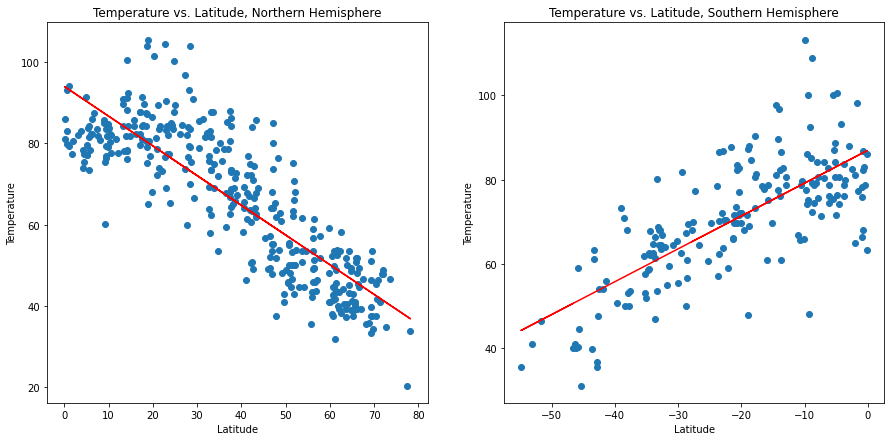

In [15]:
plt.figure(figsize=(15, 7))
linreg("Temperature")

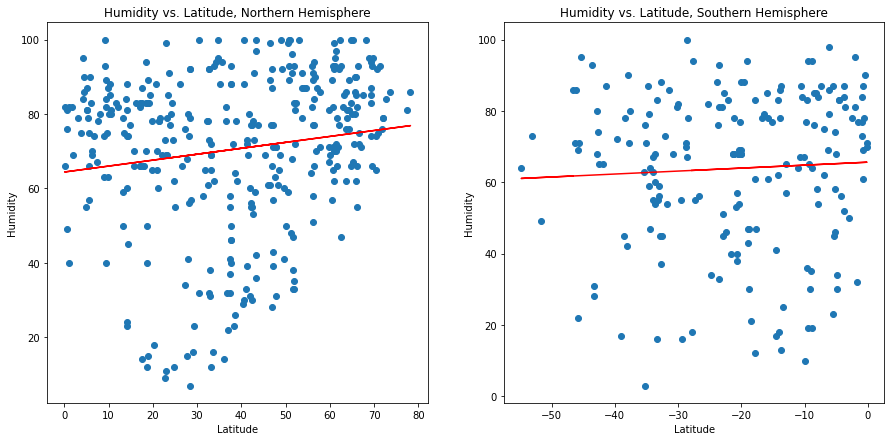

In [16]:
plt.figure(figsize=(15, 7))
linreg("Humidity")

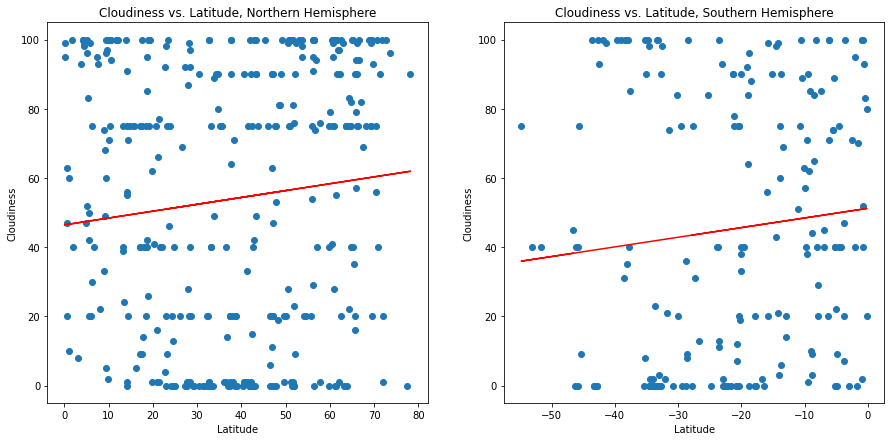

In [17]:
plt.figure(figsize=(15, 7))
linreg("Cloudiness")

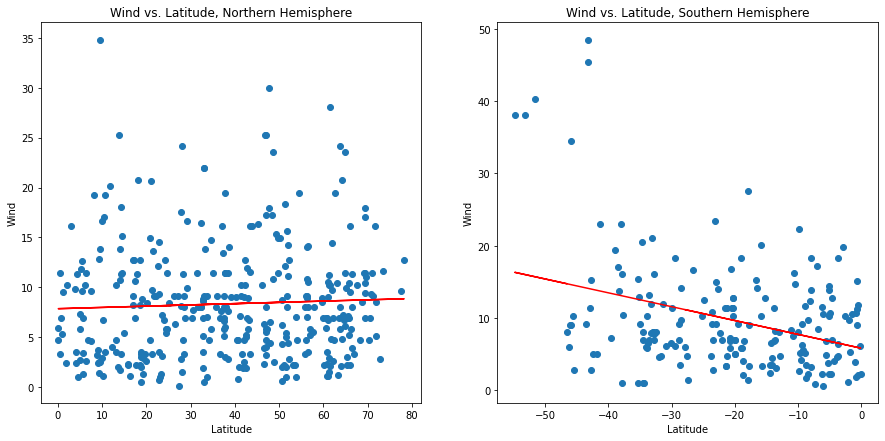

In [18]:
plt.figure(figsize=(15, 7))
linreg("Wind")

In [19]:
!jupyter nbextension enable --py gmaps
fig=gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(df[["Lat", "Long"]], weights=df["Humidity"]))
fig

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


Figure(layout=FigureLayout(height='420px'))

In [34]:
def ideal_conditions(row):
    if not 62 < row.Temperature < 72: 
        return False
    if row.Humidity > 35:
        return False
    if row.Cloudiness > 12:
        return False
    if row.Wind > 9:
        return False
    return True
df_ideal = df[df.apply(ideal_conditions, axis=1)]
df_ideal
        

,Lat,Long,City,Country,Temperature,Humidity,Cloudiness,Wind
0,-27.83,25.91,hoopstad,za,68.04,18,0,6.06
7,32.77,-108.28,silver city,us,69.19,32,1,3.51
165,38.47,106.27,yinchuan,cn,65.80,26,0,2.86
278,46.94,35.77,rozivka,ua,68.00,28,11,4.72
371,40.52,-111.94,riverton,us,69.21,30,1,4.70
498,42.06,59.38,akdepe,tm,63.52,31,0,4.70


In [35]:
# https://maps.googleapis.com/maps/api/place/nearbysearch/output?parameters
hotels = []
for i, row in df_ideal.iterrows():
#     print(row.City)
    url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?key={0}&location={1},{2}&radius=5000&keyword=hotel"
    url = url.format("APIKey", row.Lat, row.Long)
    response = requests.get(url)
#     print(response.text)
    data = response.json()
    if len(data["results"])==0:
        continue
    hotels.append({
        "city": row.City,
        "country": row.Country,
        "Lat": data["results"][0]["geometry"]["location"]["lat"],
        "Long": data["results"][0]["geometry"]["location"]["lng"],
        "Name": data["results"][0]["name"],     
    })

In [42]:
marker_locations = [(hotel["Lat"], hotel["Long"]) for hotel in hotels]
info_box_template = """
<dl>
<dt>Name</dt><dd>{Name}</dd>
<dt>City</dt><dd>{city}, {country}</dd>
</dl>
"""
info_box = []
for hotel in hotels:
    info_box.append(info_box_template.format(**hotel))
fig=gmaps.figure(zoom_level=2, center=(0,0))
fig.add_layer(gmaps.heatmap_layer(df[["Lat", "Long"]], weights=df["Humidity"]))
markers = gmaps.marker_layer(marker_locations, info_box_content=info_box)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# hotels[0]

In [ ]:
# Observable Trends Based on Data:
#
# 1.The maximum temperature peaks (City Latitude vs. Maximum Temperature Scatter Plot) are not centered over the equator
#   because countries/cities are influenced by seasonal change. The sun’s rays are directly overhead everyday
#   at the equator. In places near the equator the sun’s rays are almost directly overhead thus 
#   keeping temperatures high.  However, countries/cities that are further North or South of the equator
#   experience seasonal changes, when hot weather is followed by cold weather. This happens because the 
#   earth circles around the sun on a tilted axis, so that some places spend part of the year nearer to the sun and some
#   further away from it.

# 2. Scatter plots for Humidity, Cloudiness and Wind Speed show no correlation when compared to latitude.

# 3. Linear regression plots for Temperature versus Latitude in the Northern and Southern Hemispheres indicate
#    that temperatures decrease the further you move from the equator as a result of seasonal changes. This was also seen
#    in the City Latitude versus Maximum Temperature Scatter Plot.
#
# 4. Linear regression plots for Humidity, Cloudiness and Wind Speed show no correlation when compared to latitude. 
#    This was also seen in the City Latitude versus Humidity, Cloudiness, and Wind Speed Scatter Plots.
#
# 5. Lastly, using google maps one can plan a vacation by knowing what the climate is like depending on its 
#    position to the equator during seasonal changes.
